# **Reservoir Geomechanics EDX Course (GEOPHYSX0001)- Homework 02**

The Stanford Online Reservoir Geomechanics course is available at [EDX](https://courses.edx.org/courses/course-v1:StanfordOnline+GEOPHYSX0001+2T2020/course/). You can find more information about the course [here](https://online.stanford.edu/courses/soeees-ygeoresgeo202-reservoir-geomechanics).<br>

This file contains answers to homework number two. You should follow the questions available in the file `Reservoir_Geomechancis_MOOC_HW_2_2020.pdf` to understand the answers provided by the present file.<br>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Plot the charts inside the Notebook.
%matplotlib inline
# Plot the charts on a new Matplotlib window.
# %matplotlib qt

In [2]:
# Folder that holds the calculated on Homework 01:
HW1 = "../homework_01"

---

## Table of Contents

* [Read the Data](#read-data)
* [I. Estimate the Depths of Gulf of Mexico Overpressure](#estimate-depths)
>* [1. Predict porosity](#predict-porosity)
>* [2. Onset of overpressure](#onset)
* [II. Estimate the Magnitude of Gulf of Mexico Overpressure](#estimate-overpressure)
>* [1. Pore pressure as a function of porosity](#porepressure-function)
>* [2. Estimate overpressure](#estimate)
* [III. Answer the questions](#answer)
* [Save the Data](#save)
* [References](#references)

---

## Read the Data <a class="anchor" id="read-data"></a>

Load the GOM data generated on Homework 01:


In [3]:
gom = pd.read_excel(os.path.join(HW1, "HW1_gom_output.xlsx"))

In [4]:
gom.head()

,depth_(ft),density_(g/cm^3),block,block_density_(g/cm^3),dz_(ft),hydrostatic_(psi),overburden_(psi),block_overburden_(psi),gradient_(psi/ft),block_gradient_(psi/ft),porosity,block_porosity
0,0,1.000000,block_01,1.00000,0,0.00,0.000000,0.000000,0.433234,0.433234,1.000000,1.000000
1,1000,1.000000,block_01,1.00000,1000,440.00,433.234308,433.234308,0.433234,0.433234,1.000000,1.000000
2,1001,1.700181,block_02,1.92709,1,440.44,433.970884,434.069189,0.433537,0.433636,0.588129,0.454653
3,1002,1.700361,block_02,1.92709,1,440.88,434.707539,434.904071,0.433840,0.434036,0.588023,0.454653
4,1003,1.700541,block_02,1.92709,1,441.32,435.444272,435.738952,0.434142,0.434436,0.587917,0.454653


---

## I. Estimate the Depths of Gulf of Mexico Overpressure <a class="anchor" id="estimate-depths"></a>

Define a function to plot the data.

In [5]:
def plot_profile(title, # Title to show on top of the chart 
                 axis_y_label, y, y_limits,
                 axis_x_label, x, x_limits, x_labels, style):
    """Function to plot the data.        
        axis_y_label - The label to be shown along Y axis
        y - Y axis values - iterable
        y_limits - A list: [start, stop, step] regarding Y axis        
        axis_x_label - The label to be shown along X axis
        x - A list of iterables to plot against Y axis
        x_limits - A list: [start, stop, step] regarding X axis
        x_labels - Labels to show on the legend of each x iterable
        style - a list of named tuples representing each X series: (style, linewidth)
    """
    # Set the figure size:
    plt.figure(figsize=(16,16))
    
    # Set the figure title:
    plt.title(title, y= 1.02, fontsize=24)
    
    # Plot the data:    
    for _x, _label, _style in zip(x, x_labels, style):
        plt.plot(_x, y, _style[0], linewidth=_style[1], label=_label)

    # Turn on the grid:
    plt.grid(True)
    
    # Set the Y limits and reverse it:
    plt.ylim(y_limits[1], y_limits[0])
    
    # Set the Y ticks:
    _yticks = np.arange(y_limits[0], y_limits[1] + y_limits[2], y_limits[2])
    plt.yticks(_yticks, fontsize=16)
    
    # Set X limits:
    plt.xlim(x_limits[0], x_limits[1])
    
    # Set the X ticks:
    _xticks = np.arange(x_limits[0], x_limits[1] + x_limits[2], x_limits[2])
    plt.xticks(_xticks, fontsize=16)
    
    # Set X and Y titles and font sizes:
    plt.xlabel(axis_x_label, fontsize=20)
    plt.ylabel(axis_y_label, fontsize=20)
    
    # Insert a legend:
    plt.legend(prop={'size': 16})

---

### 1. Predict porosity <a class="anchor" id="predict-porosity"></a>

**QUESTION:<br>"_Assume an exponential porosity reduction with the effective vertical stress given by the following empirical equation:<br><br>
$\phi = \phi_0*e^{-\beta\sigma_v}$<br>
$\sigma_v = S_v - P_p$<br><br>
in which $\phi$ is the porosity, $\phi_0$ is the initial porosity, $\beta$ is the coefficient of compaction, $S_V$ is the overburden stress, and 
$P_p$ is the pore pressure. Assuming $\phi_0 = 0.4$  and $\beta = 0.0002 psi^1$ (Flemings et al., 2002), using the hydrostatic pore pressure 0.44 psi/ft, your calculation of the overburden stress from HW1, to predict porosity over the full depth range of the
GOM data set. A porosity is calculated assuming full saturation of $1.0 g/cm^3$ water in the
pores and a $2.7 g/cm^3$ density of matrix in HW1. Plot the predicted porosity versus depth
and the calculated porosity versus depth obtained in HW1 on the same plot._"**

In [6]:
# Predict the porosity according to the given equation:
gom["porosity_predicted"] = 0.4 * np.exp(-0.0002 * (gom["overburden_(psi)"] - gom["depth_(ft)"] * 0.44))

In [7]:
gom.head()

,depth_(ft),density_(g/cm^3),block,block_density_(g/cm^3),dz_(ft),hydrostatic_(psi),overburden_(psi),block_overburden_(psi),gradient_(psi/ft),block_gradient_(psi/ft),porosity,block_porosity,porosity_predicted
0,0,1.000000,block_01,1.00000,0,0.00,0.000000,0.000000,0.433234,0.433234,1.000000,1.000000,0.400000
1,1000,1.000000,block_01,1.00000,1000,440.00,433.234308,433.234308,0.433234,0.433234,1.000000,1.000000,0.400542
2,1001,1.700181,block_02,1.92709,1,440.44,433.970884,434.069189,0.433537,0.433636,0.588129,0.454653,0.400518
3,1002,1.700361,block_02,1.92709,1,440.88,434.707539,434.904071,0.433840,0.434036,0.588023,0.454653,0.400494
4,1003,1.700541,block_02,1.92709,1,441.32,435.444272,435.738952,0.434142,0.434436,0.587917,0.454653,0.400470


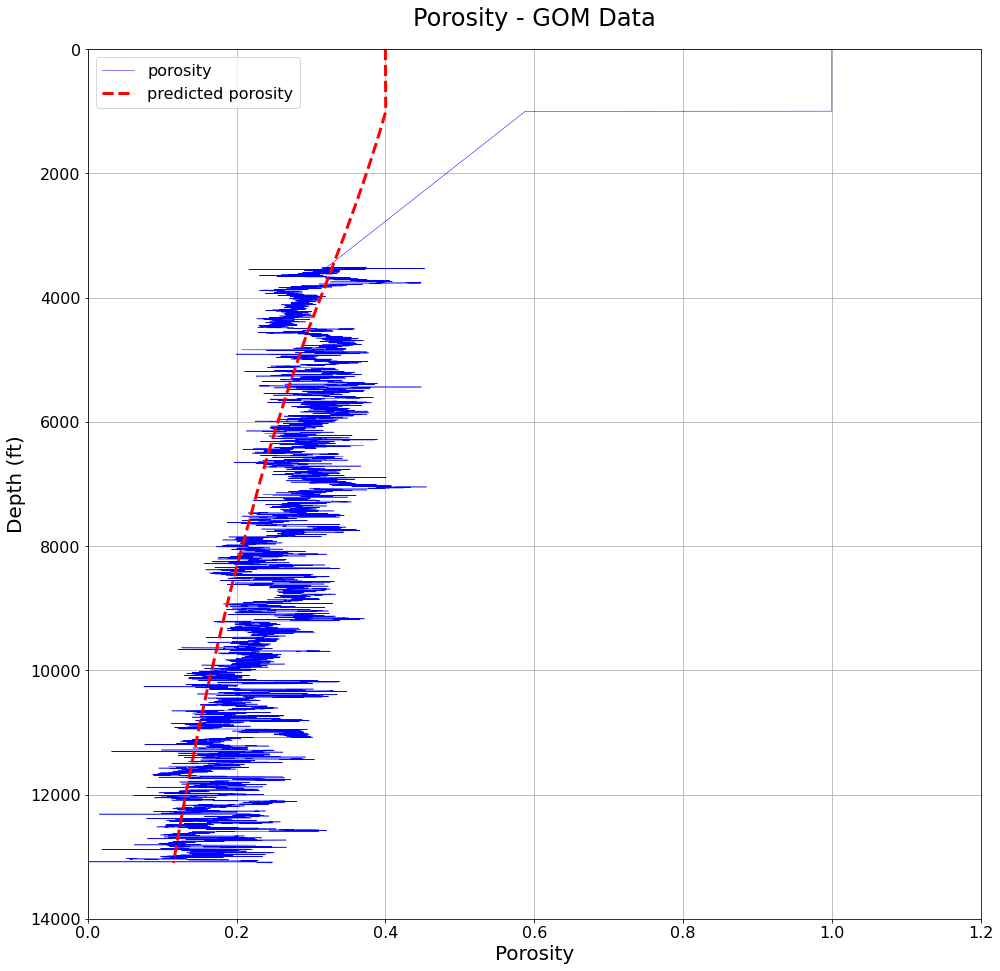

In [8]:
# Plot:
plot_profile("Porosity - GOM Data",
             # Y parameters:
             "Depth (ft)",
             gom["depth_(ft)"],             
             [0, 14000, 2000],
             # X parameters:
             "Porosity",
             [gom["porosity"], gom["porosity_predicted"]],             
             [0, 1.2, 0.2],
             ["porosity", "predicted porosity"],
             [("b", 0.5), ("r--", 3.0)])

___

### 2. Onset of overpressure <a class="anchor" id="onset"></a>

**QUESTION:<br>"_Assume that porosity increase with depth is due only to overpressure. By comparing your
calculated porosity versus depth with your predicted porosity versus depth, estimate the
depth at which the onset of overpressure first causes a deviation from a theoretical
compaction trend._"**

In [9]:
# Take a look at the chart above and you will see that it starts about 3600ft.
onset = 3600

---

## II. Estimate the Magnitude of Gulf of Mexico Overpressure <a class="anchor" id="estimate-overpressure"></a>

---

### 1. Pore pressure as a function of porosity <a class="anchor" id="porepressure-function"></a>

**QUESTION:<br>"_Rearrange the equation in I to obtain an expression for pore pressure as a function of
porosity. Calculate the pore pressure using the density porosity and the overburden stress which are obtained in HW1. Plot this calculated pore pressure as well as the hydrostatic
pore pressure and the overburden stress versus depth on the same plot._"**

Rearranging the expression:<br>
$P_p = S_v + \frac{log{_e}{\phi}-log{_e}{\phi_0}}{\beta}$

Remember, form homework 01, that data starts from 3515ft.

In [10]:
# Calculate:
gom.loc[gom["depth_(ft)"] > 3515, "pore_pressure_(psi)"] = gom["overburden_(psi)"] + (np.log(gom["porosity"]) - np.log(0.4))/0.0002

C:\Users\2swim\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


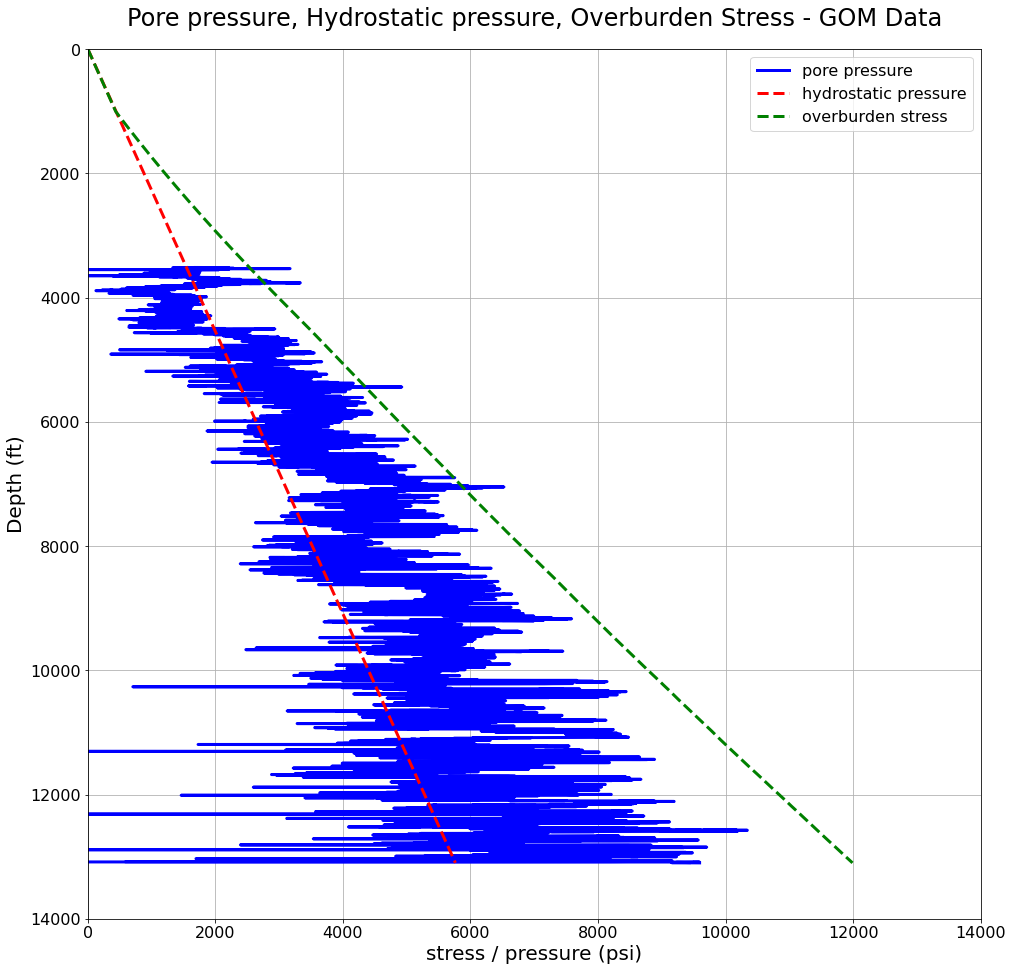

In [11]:
# Plot:
plot_profile("Pore pressure, Hydrostatic pressure, Overburden Stress - GOM Data",
             # Y parameters:
             "Depth (ft)",
             gom["depth_(ft)"],             
             [0, 14000, 2000],
             # X parameters:
             "stress / pressure (psi)",
             [gom["pore_pressure_(psi)"], gom["hydrostatic_(psi)"], gom["overburden_(psi)"]],             
             [0, 14000, 2000],
             ["pore pressure", "hydrostatic pressure", "overburden stress"],
             [("b", 3.0), ("r--", 3.0), ("g--", 3.0)])

---

### 2. Estimate overpressure <a class="anchor" id="estimate"></a>

**QUESTION:<br>"_By subtracting hydrostatic pore pressure from the calculated pore pressure using porosity
data, estimate the magnitude of the overpressure in the GOM data set._"**

In [12]:
gom["overpressure_(psi)"] = gom["pore_pressure_(psi)"] - gom["hydrostatic_(psi)"]

In [13]:
gom.tail()

,depth_(ft),density_(g/cm^3),block,block_density_(g/cm^3),dz_(ft),hydrostatic_(psi),overburden_(psi),block_overburden_(psi),gradient_(psi/ft),block_gradient_(psi/ft),porosity,block_porosity,porosity_predicted,pore_pressure_(psi),overpressure_(psi)
12097,13096,2.314,block_05,2.403178,1,5762.24,11986.550494,11986.363462,0.915283,0.915269,0.227059,0.174601,0.115192,9155.273350,3393.033350
12098,13097,2.314,block_05,2.403178,1,5762.68,11987.552998,11987.404601,0.915290,0.915279,0.227059,0.174601,0.115179,9156.275854,3393.595854
12099,13098,2.294,block_05,2.403178,1,5763.12,11988.546837,11988.445740,0.915296,0.915288,0.238824,0.174601,0.115167,9409.848645,3646.728645
12100,13099,2.294,block_05,2.403178,1,5763.56,11989.540677,11989.486879,0.915302,0.915298,0.238824,0.174601,0.115154,9410.842484,3647.282484
12101,13100,2.279,block_05,2.403178,1,5764.00,11990.528018,11990.528018,0.915307,0.915307,0.247647,0.174601,0.115141,9593.228196,3829.228196


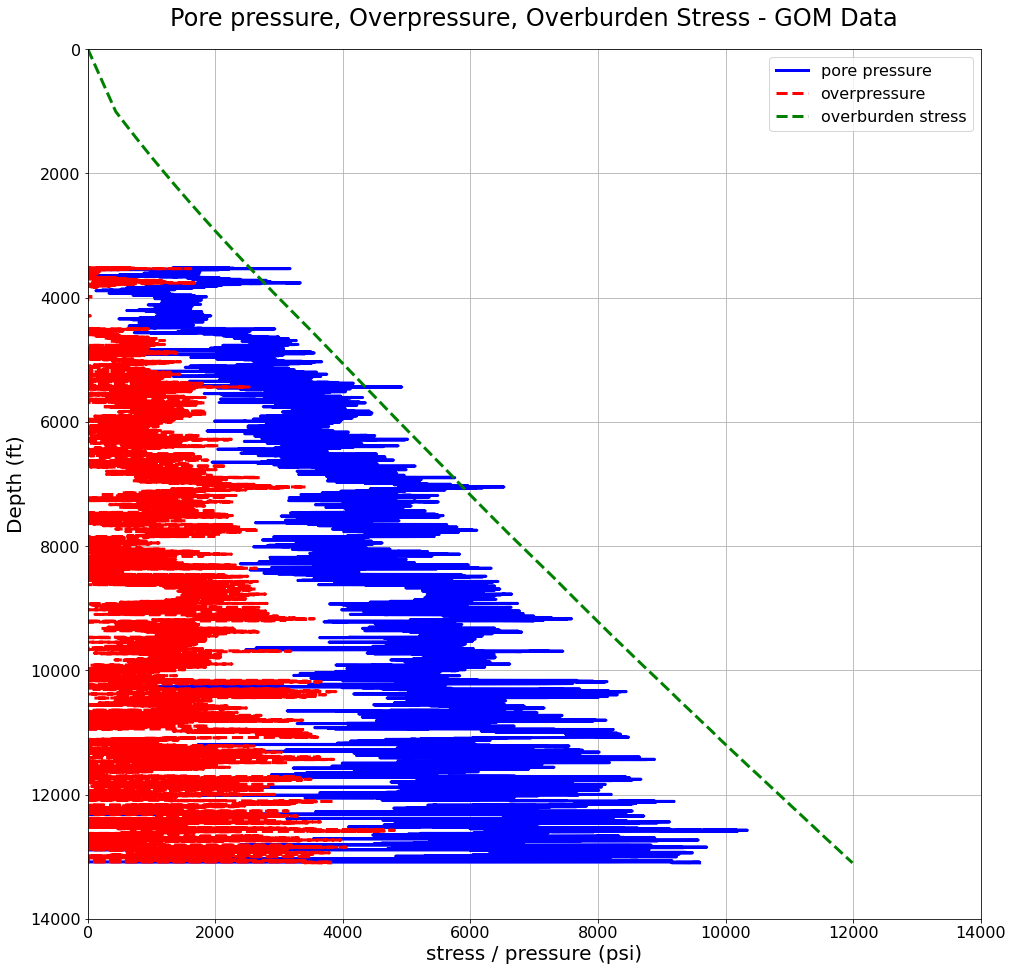

In [14]:
# Plot:
plot_profile("Pore pressure, Overpressure, Overburden Stress - GOM Data",
             # Y parameters:
             "Depth (ft)",
             gom["depth_(ft)"],             
             [0, 14000, 2000],
             # X parameters:
             "stress / pressure (psi)",
             [gom["pore_pressure_(psi)"], gom["overpressure_(psi)"], gom["overburden_(psi)"]],             
             [0, 14000, 2000],
             ["pore pressure", "overpressure", "overburden stress"],
             [("b", 3.0), ("r--", 3.0), ("g--", 3.0)])

___

## III. Answer the questions <a class="anchor" id="answer"></a>

**"_Use the calculations from I and II to answer the questions on the page below. The answers will
be posted a day after the homework assignment is due. Please adhere to the value of constants
given here. Numerical entry type responses have a range of acceptable values and are graded
electronically. Please do not write units in the answer, just write the number. We will specify the
units that we want the answer in._"**

---

"_Question 1.a: Concepts of Overpressure<br>
Which of the following is a mechanism of overpressure generation in geologic reservoirs?_"

All of the above are possible mechanisms of overpressure.

---

"_Question 1.b: Concepts of Overpressure<br>
 Overpressure generation by disequilibrium compaction is most likely to occur in which case?_"

The rate of compaction and porosity loss exceeds the rate of fluid flow.

---

"_Question 1.c: Concepts of Overpressure<br>
Hydrocarbon column heights can result in substantial overpressure at the top of reservoir compartments especially when appreciable amounts of buoyant gas are present._"

True

---

"_Question 1.d: Concepts of Overpressure<br>
Pressure reversals (that is, pore pressure decreases with increasing depth) can result from:_"

Drilling into a less hydrologically isolated reservoir (that is, a reservoir that is more drained during consolidation than the formations above)

---

"_Question 2.a: Estimating a pore pressure<br>
What is the pore pressure at 6,000 ft? Enter your answer in psi **without** units._"

In [16]:
gom[gom["depth_(ft)"] == 6000].transpose()

,5001
depth_(ft),6000
density_(g/cm^3),2.22
block,block_03
block_density_(g/cm^3),2.19458
dz_(ft),1
hydrostatic_(psi),2640
overburden_(psi),4879.19
block_overburden_(psi),4895.62
gradient_(psi/ft),0.813198
block_gradient_(psi/ft),0.815937


---

"_Question 2.b: Estimating a pore pressure<br>
What is the pore pressure at 10,000 ft? Enter your answer in psi **without** units._"

In [17]:
gom[gom["depth_(ft)"] == 10000].transpose()

,9001
depth_(ft),10000
density_(g/cm^3),2.364
block,block_04
block_density_(g/cm^3),2.31359
dz_(ft),1
hydrostatic_(psi),4400
overburden_(psi),8783.91
block_overburden_(psi),8801.81
gradient_(psi/ft),0.878391
block_gradient_(psi/ft),0.880181


---

"_Question 3.a: Estimating a pore pressure gradient<br>
For calculation of mud weight, drillers are interested in the average gradient from the surface to the depth of interest, which is pore pressure divided by the depth.<br>
What is the pore pressure gradient at 6,000 ft? Round your answers to two decimal places. Enter your answer in psi/ft **without** units._"

In [18]:
gom[gom["depth_(ft)"] == 6000].transpose()

,5001
depth_(ft),6000
density_(g/cm^3),2.22
block,block_03
block_density_(g/cm^3),2.19458
dz_(ft),1
hydrostatic_(psi),2640
overburden_(psi),4879.19
block_overburden_(psi),4895.62
gradient_(psi/ft),0.813198
block_gradient_(psi/ft),0.815937


In [19]:
3137.65/6000

0.5229416666666666

---

"_Question 3.b: Overburden Stress Gradient Profiles<br>
For calculation of mud weight, drillers are interested in the average gradient from the surface to the depth of interest, which is pore pressure divided by the depth.<br> What is the pore pressure gradient at 10,000 ft? Round your answers to two decimal places. Enter your answer in psi/ft **without** units._"

In [22]:
gom[gom["depth_(ft)"] == 10000].transpose()

,9001
depth_(ft),10000
density_(g/cm^3),2.364
block,block_04
block_density_(g/cm^3),2.31359
dz_(ft),1
hydrostatic_(psi),4400
overburden_(psi),8783.91
block_overburden_(psi),8801.81
gradient_(psi/ft),0.878391
block_gradient_(psi/ft),0.880181


In [21]:
5259/10000

0.5259

---

"_Question 3.c: Estimating a pore pressure gradient<br>
The smaller the “mud window” the harder it is to manage drilling parameters such as mud weight._"

True

---

"_Question 4.: Estimating the onset of overpressure<br>
Comparing the predicted and calculated porosities to estimate the depth of the onset of overpressure in the GOM data set. Enter you answer in feet **without** units._"

3600

---

"_Question 5.: Estimating the magnitude of overpressure<br>
A magnitude of the overpressure is the difference between the calculated pore pressure and the hydrostatic pore pressure. Estimate the magnitude of the overpressure at 9,000 ft in the Gulf Of Mexico data set. Enter you answer in psi **without** units._"

In [23]:
gom[gom["depth_(ft)"] == 9000].transpose()

,8001
depth_(ft),9000
density_(g/cm^3),2.332
block,block_04
block_density_(g/cm^3),2.31359
dz_(ft),1
hydrostatic_(psi),3960
overburden_(psi),7785.42
block_overburden_(psi),7799.48
gradient_(psi/ft),0.865047
block_gradient_(psi/ft),0.866609


In [24]:
4715.37 - 3960

755.3699999999999

___

## Save the Data <a class="anchor" id="save"></a>

In [ ]:
# GOM data:
gom.to_excel("HW2_gom_output.xlsx", index=False)

---

## References <a class="anchor" id="references"></a>

1. Stanford. (n.d.). Reservoir Geomechanics. https://online.stanford.edu/courses/soeees-ygeoresgeo202-reservoir-geomechanics
1. Zoback M. D. (2007). Resevoir Geomechanics. Cambridge University Press
1. Pandas. pandas documentation. (2020, October 30). https://pandas.pydata.org
1. NumPy. NumPy v1.19 Manual. (2020, June 29). https://numpy.org/doc/stable/
1. Matplotlib. Pyplot tutorial. (2020, November 12). https://matplotlib.org/tutorials/introductory/pyplot.html